In [1]:

import pandas as pd
import numpy as np

from ImportUtils import vprint, vprint_time

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')
# plt.style.use('seaborn')


# import seaborn as sns
import locale

# Set the locale to your system's default (for the desired thousands separator)
locale.setlocale(locale.LC_ALL, 'pt_PT')

from ImportUtils import get_dfAll_from_Parquet, get_dfGeo_from_Parquet, get_dfGeo_from_MDB


dfAll = get_dfAll_from_Parquet()
# dfGeo = get_dfGeo_from_Parquet()


In [3]:
# define the colors and their positions for the colormap
#colors = ["#BED62F", "#5C666C"]

cdict = {
    'red': [(0, 0.5, 0.5), (1.0, 0.5, 0.5)],
    'green': [(0, 0.5, 0.5), (1.0, 0.8, 0.8)],
    'blue': [(0, 0.5, 0.5), (1.0, 0.2, 0.2)]
}

try:
	plt.cm.unregister_cmap('NOVAIMS_cmap')
except:
	pass

# create the colormap from the dictionary
nova_cmap = mcolors.LinearSegmentedColormap('nova_cmap', cdict)

# register the colormap with matplotlib
plt.cm.register_cmap('NOVAIMS', nova_cmap)


# Define global parameters for plots

# plt.rcParams['font.size']=20
# plt.rcParams['axes.labelsize']=12 # fontsize of the x any y labels
# plt.rcParams['axes.titlesize']=16 # fontsize of the axes title
# plt.rcParams['xtick.labelsize']=24 # fontsize of the tick labels
# plt.rcParams['ytick.labelsize']=24 # fontsize of the tick labels
# plt.rcParams['legend.fontsize']=32 # legend fontsize
# plt.rcParams['figure.titlesize']=16 # fontsize of the figure title
# plt.rcParams['figure.figsize'] = (16, 9) # figure size in inches
# plt.rcParams['axes.grid'] = True



In [4]:
def chart_bar(df, xvar='', xlabel = '', xlimit=(0,20), yvar='count', ylabel='Número de exames', ylimit=(0, None), zvar='', title=None, grid=None, colormap='NOVAIMS', stacked=False, normalize=False):
	# Pivot the DataFrame to create the data for the stacked bar chart



	if zvar == '' or zvar == None:
		df_grouped = df.groupby(xvar).size().reset_index(xvar)
	else:
		df_grouped = df.groupby(xvar)[zvar].value_counts(normalize=normalize).unstack(zvar)

		df_grouped = df_grouped.reset_index()
	
	plt = df_grouped.plot.bar(x=xvar, stacked=stacked, colormap=colormap, figsize=(10,5), grid=grid, title=title, xlabel=xlabel, ylabel=ylabel, xlim=xlimit, ylim=ylimit, rot=0, fontsize=12, legend=True, ax=None, subplots=False)

	# show the plot
	plt.show()


In [ ]:
# def zz():
# 	df_grouped = np.dataframe

# 	df_grouped.plot(kind='bar', stacked=stacked, colormap=colormap)


# 	# Plot the stacked bar chart
	
# 	if xlabel is None:
# 		xlabel = xvar.capitalize()
# 	if ylabel is None:
# 		ylabel = 'Contagem'
# 	if legendlabel is None:
# 		legendlabel = zvar.capitalize()
# 	if title is None:
# 		title = "Exames por " + xvar.capitalize() + " e por " + zvar.capitalize()


# 	plt.xlabel(xlabel=xlabel)
# 	plt.ylabel(ylabel=ylabel)
# 	plt.title( label=title, loc='center', pad=20, fontsize=12, fontweight='bold')
# 	plt.legend(title=legendlabel)
# 	# plt.grid(grid)

# 	plt.show()


In [5]:
def chart_line(df, xvar='', xlabel = '', xlimit=(0,20), yvar='count', ylabel='Número de exames', ylimit=(0, None), zvar='', title=None, grid=True, colormap='NOVAIMS', stacked=False, normalize=False):
#def chart_bar(df, xvar='Class_Exam', xlabel = 'Nota no exame', xlimit=(0,20), yvar='count', ylabel='Número de exames', ylimit=(0, None), zvar='Fase', title=None, grid=True, colormap='Set3', stacked=False, normalize=False):
	# Pivot the DataFrame to create the data for the stacked bar chart

	if zvar == '' or zvar == None:
		df_grouped = df.groupby(xvar).size().reset_index(xvar)
	else:
		df_grouped = df.groupby(xvar)[zvar].value_counts(normalize=normalize).unstack(zvar)
		df_grouped = df_grouped.reset_index()
	
	df_grouped.plot.line(x=xvar, stacked=stacked, colormap=colormap, figsize=(10,5), grid=grid, title=title, xlabel=xlabel, ylabel=ylabel, xlim=xlimit, ylim=ylimit, rot=0, fontsize=12, legend=True, ax=None, subplots=False)


In [6]:
def chart(kind="line", df=dfAll, xvar='', xlabel = '', xlimit=None, yvar='count', ylabel='Número de exames', ylimit=(0, None), zvar='', title=None, grid=True, colormap='NOVAIMS', stacked=False, normalize=False, xAxisScale=None, xAxisScaleSymbol=None, yAxisScale=None, yAxisScaleSymbol=None):
	# Pivot the DataFrame to create the data for the stacked bar chart

	if zvar == '' or zvar == None:
		df_grouped = df.groupby(xvar).size().reset_index(xvar)
	else:
		df_grouped = df.groupby(xvar)[zvar].value_counts(normalize=normalize).unstack(zvar)
		df_grouped = df_grouped.reset_index()
	
	# grid=grid, 
	plt = df_grouped.plot(kind=kind, x=xvar, y=yvar, stacked=stacked, colormap=colormap, figsize=(10,5), title=title, xlabel=xlabel, ylabel=ylabel, xlim=xlimit, ylim=ylimit, rot=0, fontsize=12, legend=True, ax=None, grid=grid, subplots=False)
	if grid == True:
		plt.grid(axis='x')
	
	if not xAxisScale is None or not xAxisScaleSymbol is None:
		if xAxisScale is None:
			xAxisScale = 1
		if xAxisScaleSymbol is None:
			xAxisScaleSymbol = ''
		plt.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*xAxisScale:,.0f}{xAxisScaleSymbol}' ))

	if not yAxisScale is None or not yAxisScaleSymbol is None:
		if yAxisScale is None:
			yAxisScale = 1
		if yAxisScaleSymbol is None:
			yAxisScaleSymbol = ''
		plt.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*yAxisScale:,.0f}{yAxisScaleSymbol}' ))


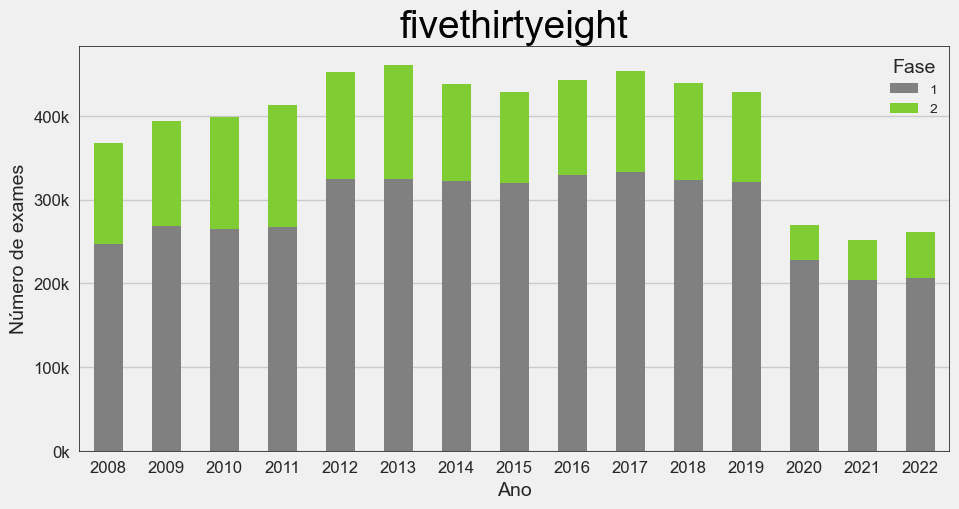

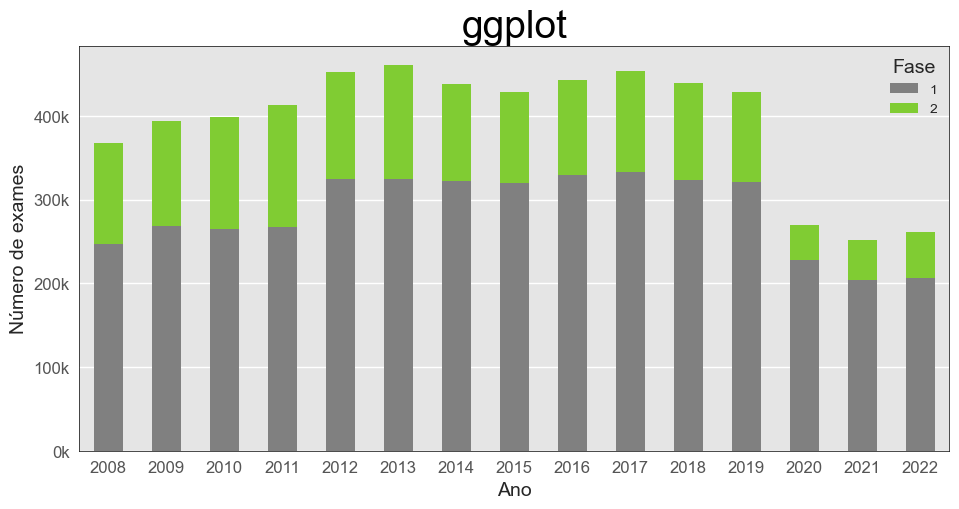

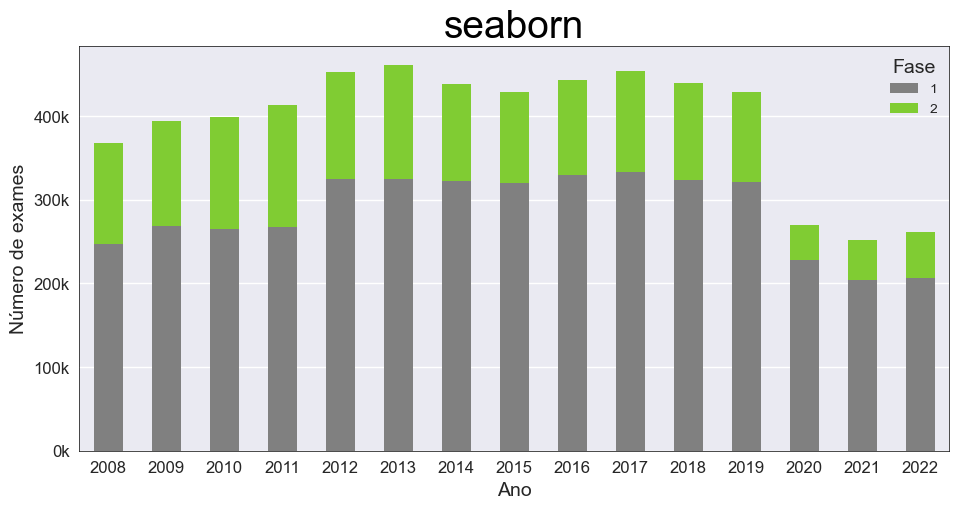

In [62]:
# plt.rcParams['font.size']=16
# plt.rcParams['axes.labelsize']=18 # fontsize of the x any y labels
# plt.rcParams['axes.titlesize']=28 # fontsize of the axes title
# plt.rcParams['xtick.labelsize']=18 # fontsize of the tick labels
# plt.rcParams['ytick.labelsize']=18 # fontsize of the tick labels
# plt.rcParams['legend.fontsize']=16 # legend fontsize
# plt.rcParams['figure.titlesize']=22 # fontsize of the figure title
# plt.rcParams['figure.figsize'] = (16, 9) # figure size in inches
# plt.rcParams['axes.grid'] = True

#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('seaborn')




lststyles = ['seaborn']
lststyles = ['fivethirtyeight', 'ggplot', 'seaborn']

#1 Total exames, por ano e fase
title = "Exames realizados, por ano e por fase"

# classic, dark_background
#plt.style.use('classic')

lst = ['NOVAIMS_cmap']
#for cmapitem in cmaps:
for cmapitem in lststyles:

	#print(plt.rcParams)
	#for pltstyle in lststyles:
	# print(cmapitem)
	plt.style.use(cmapitem)
	plt.rcParams["font.size"] = 14.0
	plt.rcParams["axes.edgecolor"] = "black"
	# axes.grid: True
	# axes.grid.axis: both
	# axes.grid.which: major
	plt.rcParams["axes.labelsize"] = 6.0
	# axes.labelweight: normal
	# axes.linewidth: 0.0
	plt.rcParams["axes.linewidth"] = 0.5

	plt.rcParams["axes.titlecolor"] = "black"
	plt.rcParams["axes.titlesize"] = 28.0
	plt.rcParams["axes.titleweight"] = "normal"

	# plt.rcParams["figure.figsize"] = [8.0, 5.5]

	plt.rcParams["figure.titlesize"] = "large"
	plt.rcParams["figure.titleweight"] = "normal"

	plt.rcParams["grid.color"] = "silver"
	plt.rcParams["grid.linestyle"] = "-"
	plt.rcParams["grid.linewidth"] = 0.5
	#plt.rcParams["xtick.labelsize"] = 28.0


	chart(kind="bar", df=dfAll, xvar='ano', xlabel="Ano", yvar=None, ylabel='Número de exames', zvar = "Fase", title=cmapitem, stacked=True, yAxisScale=1/1000, yAxisScaleSymbol='k')
#	chart(kind="bar", df=dfAll, xvar='ano', xlabel="Ano", yvar=None, ylabel='Número de exames', zvar = "Fase", title=cmapitem, stacked=True, yAxisScale=1/1000, yAxisScaleSymbol='k', colormap=cmapitem, grid=False)
#	chart(kind="bar", df=dfAll, xvar='ano', xlabel="Ano", yvar=None, ylabel='Número de exames', zvar = "Fase", title=cmapitem, stacked=True, yAxisScale=1/1000, yAxisScaleSymbol='k', colormap=cmapitem, grid=True)
#	chart(kind="bar", df=dfAll, xvar='ano', xlabel="Ano", yvar=None, ylabel='Número de exames', zvar = "Fase", title=cmapitem, stacked=True, yAxisScale=1/1000, yAxisScaleSymbol='k', colormap=cmapitem, grid={'axis': 'x'})
#	chart(kind="bar", df=dfAll, xvar='ano', xlabel="Ano", yvar=None, ylabel='Número de exames', zvar = "Fase", title=cmapitem, stacked=True, yAxisScale=1/1000, yAxisScaleSymbol='k', colormap=cmapitem, grid={'axis': 'y'})
	# print(cmaps["Sequential(2)"])

#lst = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
#print(lst)



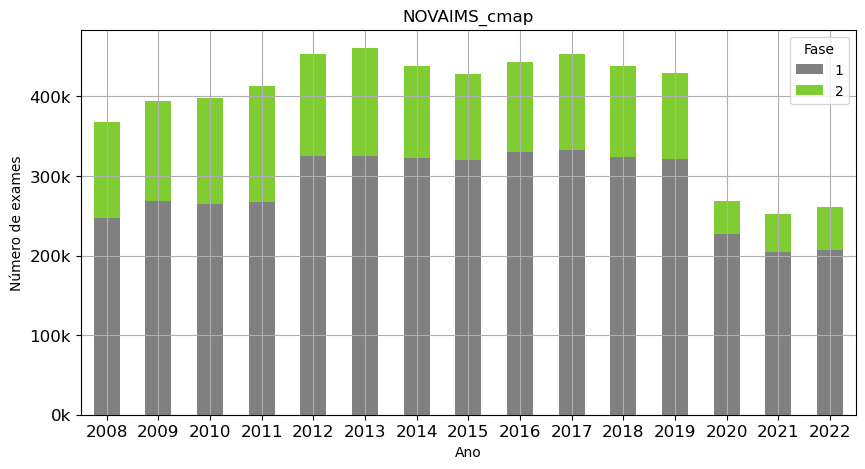

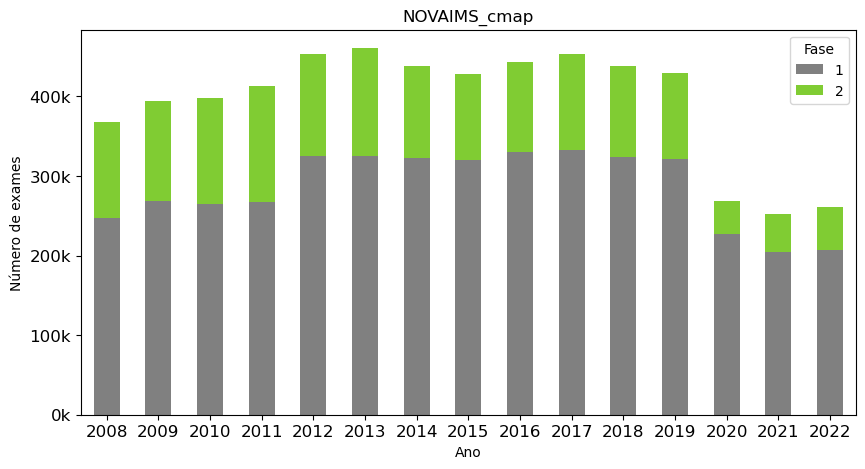

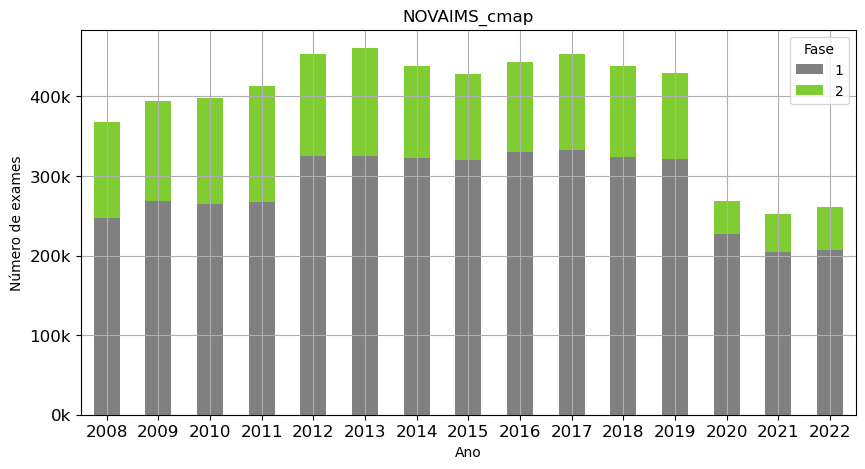

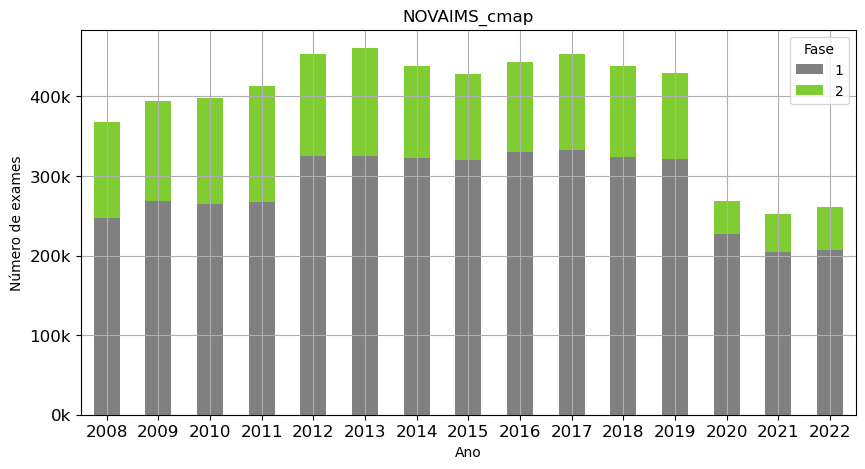

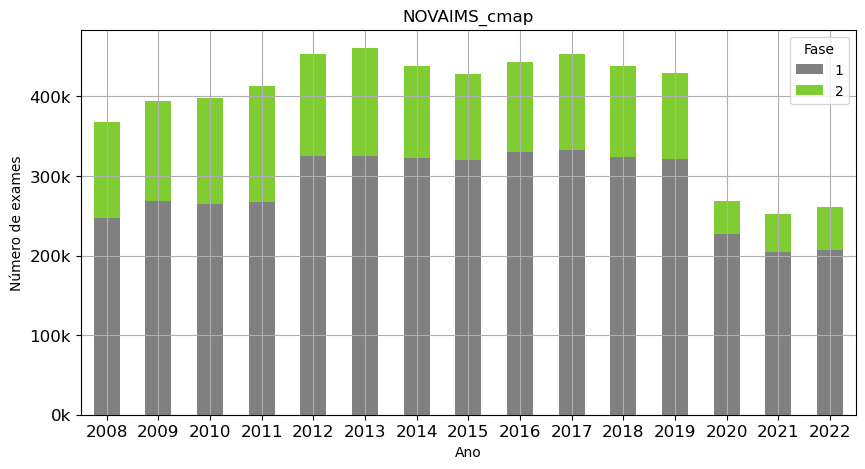

In [234]:


#1 Total exames, por ano e fase
title = "Exames realizados, por ano e por fase"
#chart_bar( dfAll, xvar='ano', yvar='count', ylabel='Número de exames', zvar = "Fase", title=title)
#chart(kind="bar", df=dfAll, xvar='ano', yvar=None, ylabel='Número de exames', zvar = "Fase", title=title, stacked=True)

# region x

cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]


lst = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
lst = ['viridis', 'plasma', 'inferno', 'magma', 'cividis',
         'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn',
       'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper',
    'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic',
         'twilight', 'twilight_shifted', 'hsv',
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c',
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar']

# endregion

lst = ['NOVAIMS_cmap']
#for cmapitem in cmaps:
for cmapitem in lst:
	# print(cmapitem)
	chart(kind="bar", df=dfAll, xvar='ano', xlabel="Ano", yvar=None, ylabel='Número de exames', zvar = "Fase", title=cmapitem, stacked=True, yAxisScale=1/1000, yAxisScaleSymbol='k', colormap=cmapitem)
	chart(kind="bar", df=dfAll, xvar='ano', xlabel="Ano", yvar=None, ylabel='Número de exames', zvar = "Fase", title=cmapitem, stacked=True, yAxisScale=1/1000, yAxisScaleSymbol='k', colormap=cmapitem, grid=False)
	chart(kind="bar", df=dfAll, xvar='ano', xlabel="Ano", yvar=None, ylabel='Número de exames', zvar = "Fase", title=cmapitem, stacked=True, yAxisScale=1/1000, yAxisScaleSymbol='k', colormap=cmapitem, grid=True)
	chart(kind="bar", df=dfAll, xvar='ano', xlabel="Ano", yvar=None, ylabel='Número de exames', zvar = "Fase", title=cmapitem, stacked=True, yAxisScale=1/1000, yAxisScaleSymbol='k', colormap=cmapitem, grid={'axis': 'x'})
	chart(kind="bar", df=dfAll, xvar='ano', xlabel="Ano", yvar=None, ylabel='Número de exames', zvar = "Fase", title=cmapitem, stacked=True, yAxisScale=1/1000, yAxisScaleSymbol='k', colormap=cmapitem, grid={'axis': 'y'})
	#chart(kind="bar", df=dfAll, xvar='ano', xlabel="Ano", yvar=None, ylabel='Número de exames', zvar = "Fase", title=title, stacked=True, yAxisScale=1/1000, yAxisScaleSymbol='k', colormap=cmapitem)
	# print(cmaps["Sequential(2)"])

#lst = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']
#print(lst)





In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

viridis = mpl.colormaps['viridis'].resampled(8)

#print(viridis(0.56))
print(viridis.colors)


samu = mpl.colormaps.add_cmap('samu', viridis.resampled(2))
#samu = mpl.colormaps['samu'].resampled(8)

#print(viridis(0.56))
print(samu.colors)


In [ ]:
top = mpl.colormaps['Oranges_r'].resampled(128)
bottom = mpl.colormaps['Blues'].resampled(128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')
plot_examples([viridis, newcmp])


In [ ]:
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(90/256, 1, N)
vals[:, 1] = np.linspace(40/256, 1, N)
vals[:, 2] = np.linspace(40/256, 1, N)
newcmp = ListedColormap(vals)
plot_examples([viridis, newcmp])

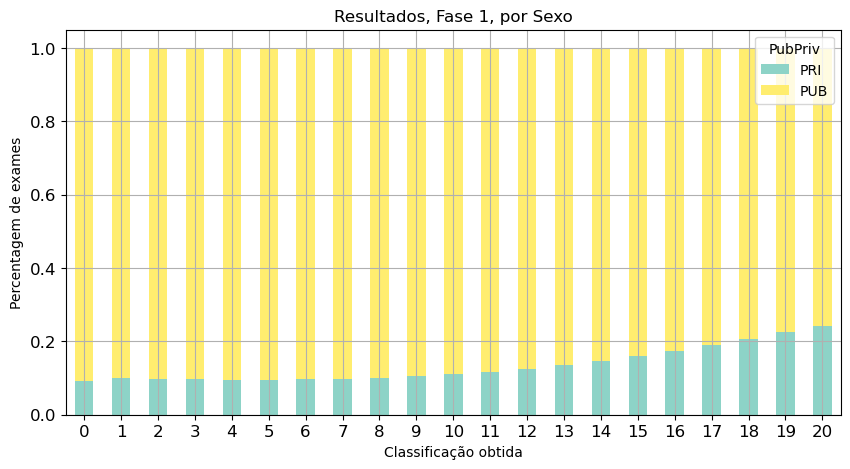

In [165]:
# Final plots
dfAllFase1 = dfAll[dfAll["Fase"]=="1"]

xList = list(dfAll.groupby('DescrExame').size().reset_index(name='count').sort_values('count', ascending=False).head(10)['DescrExame'])


Exames realizados, por ano e por fase
Top-10 de provas de exame mais realizadas, por fase
Provas de exame mais realizadas, 1a Fase, por sexo
Provas de exame realizadas, Fase 1, por NUT II
Provas de exame realizadas, Fase 1, PUB vs PRIV
Resultados, Fase 1 e Fase 2
Resultados, Fase 1, PUB vs PRIV
Resultados, Fase 1, por Sexo


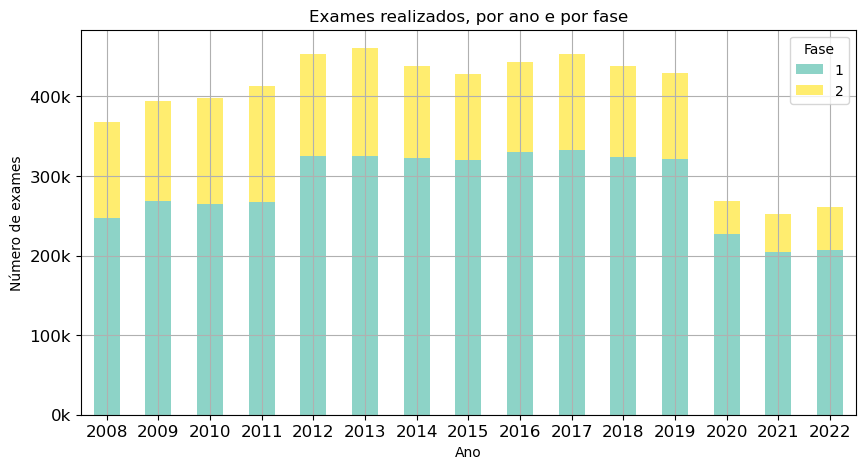

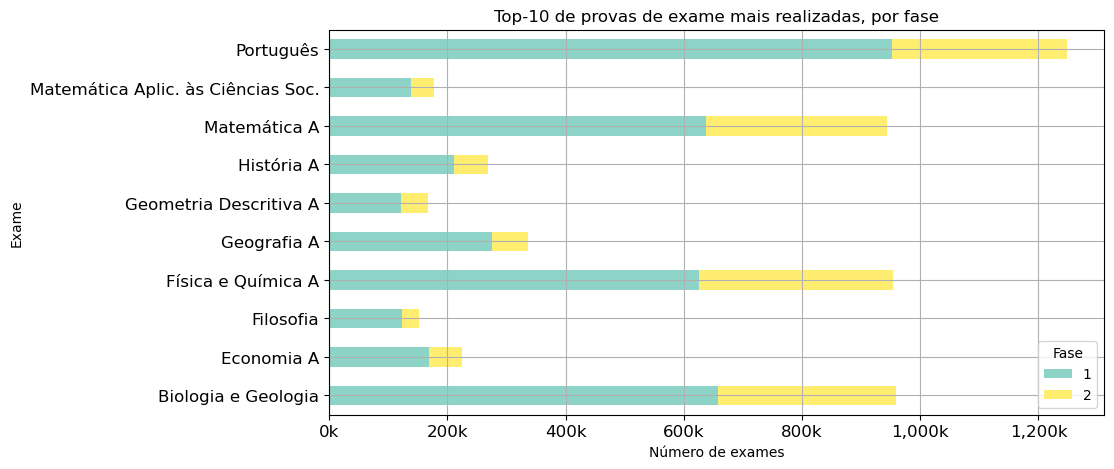

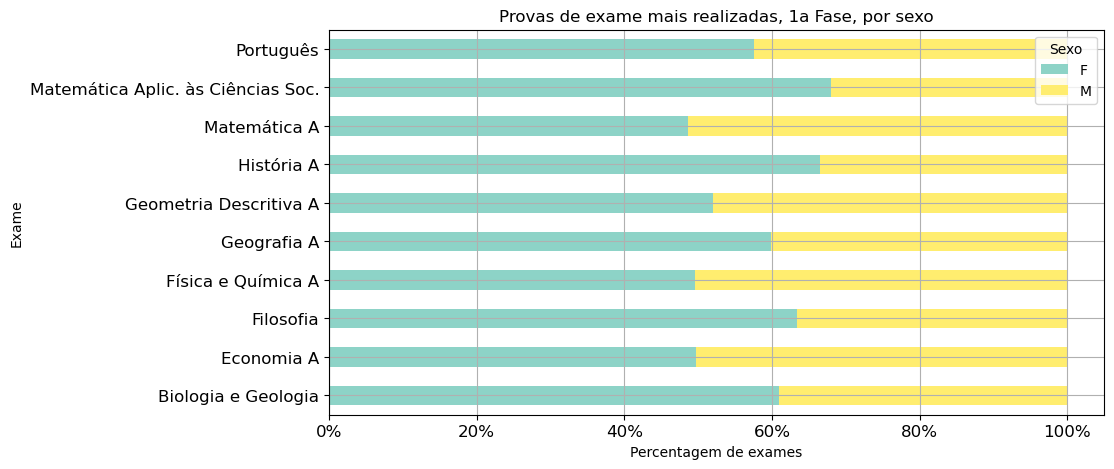

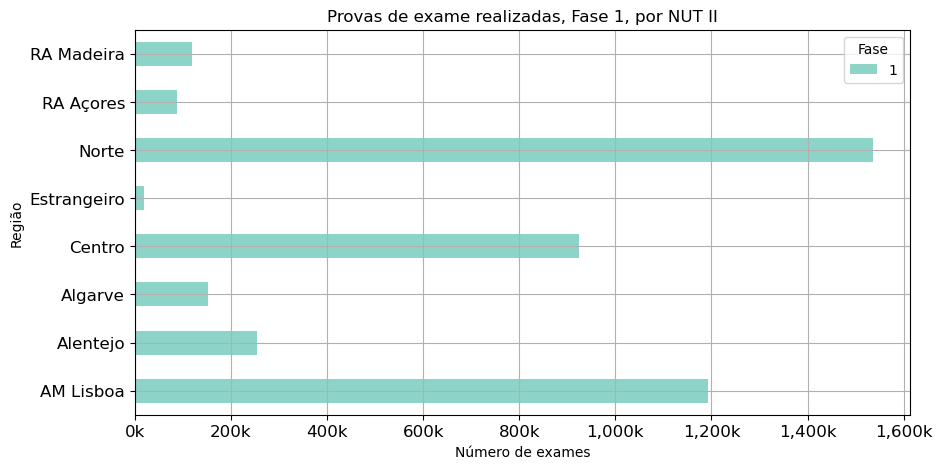

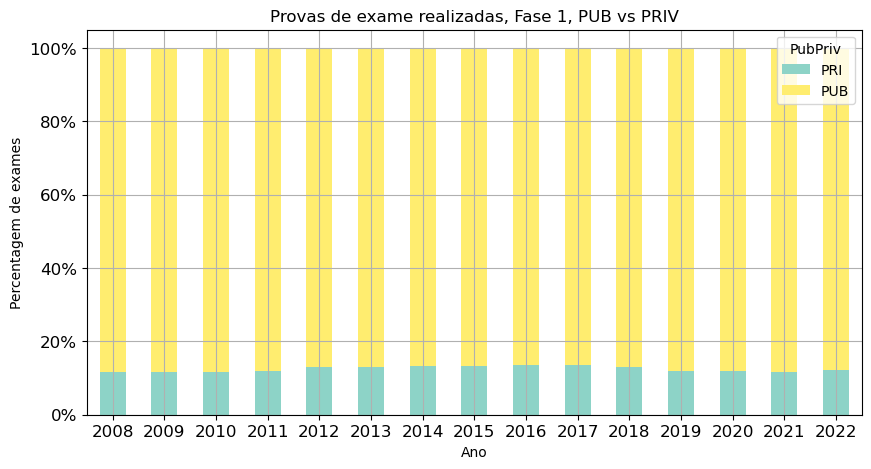

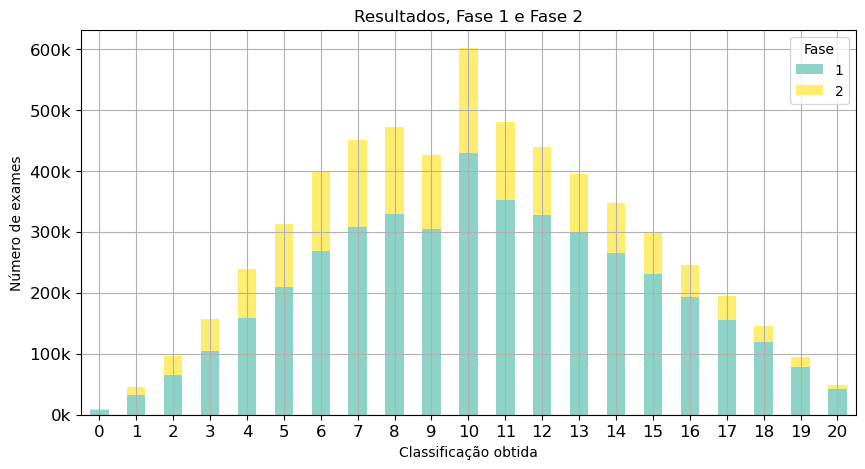

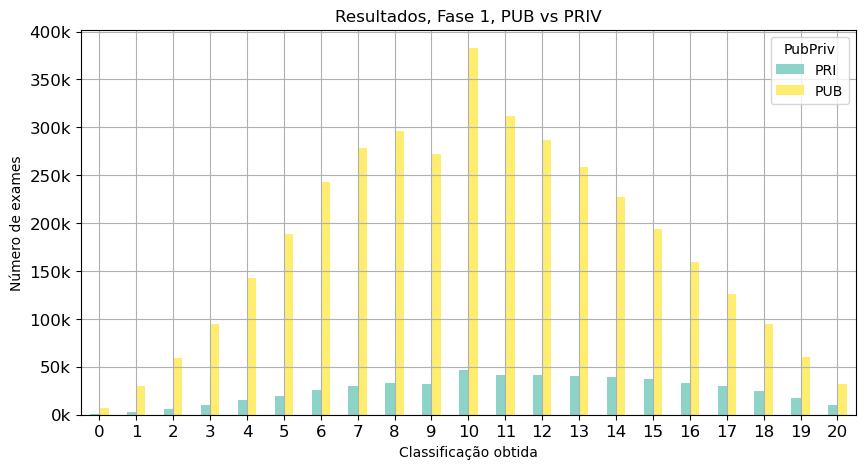

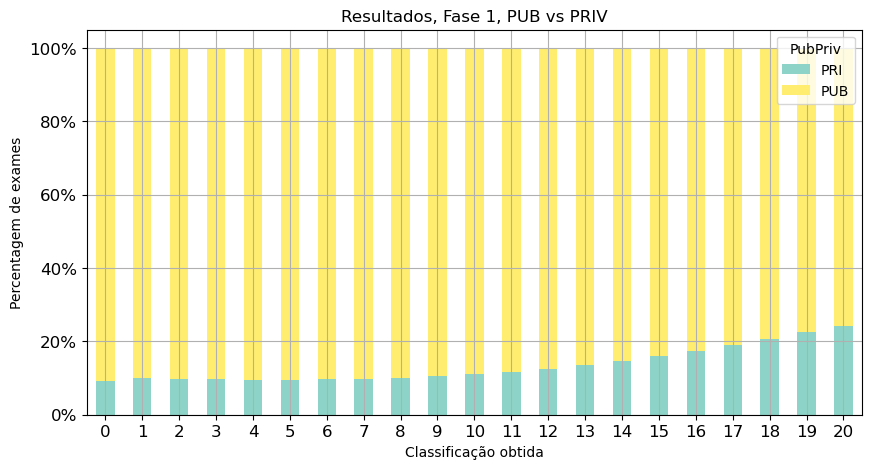

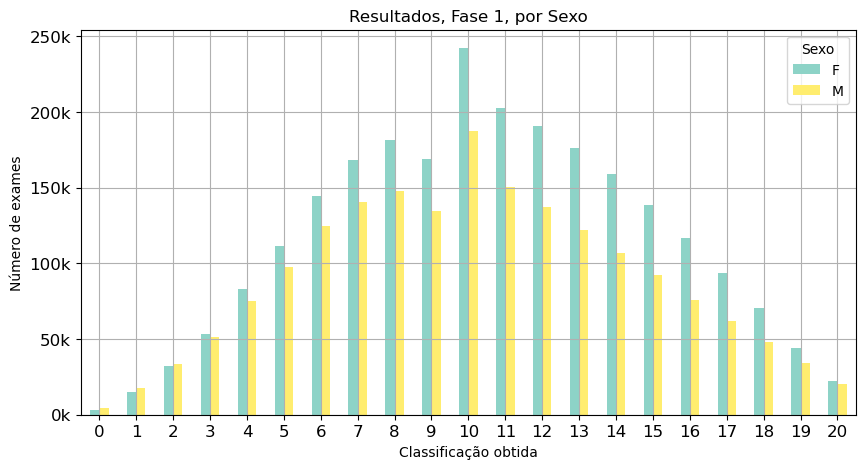

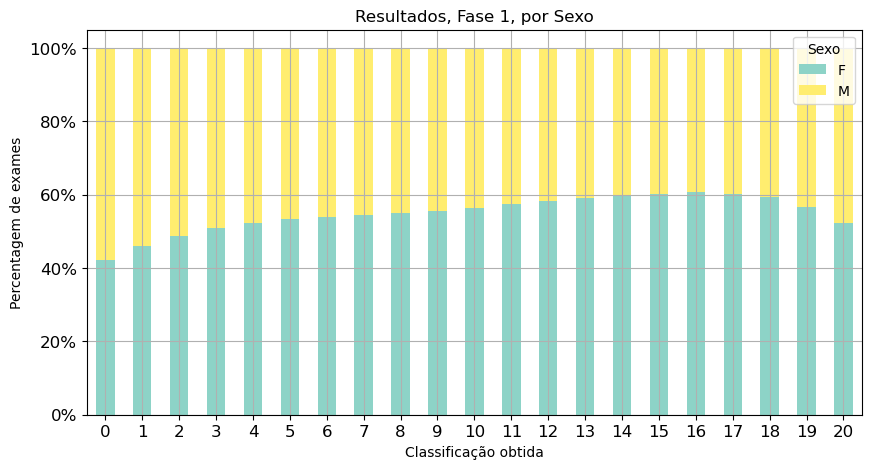

In [167]:
# Final plots
dfAllFase1 = dfAll[dfAll["Fase"]=="1"]

xList = list(dfAll.groupby('DescrExame').size().reset_index(name='count').sort_values('count', ascending=False).head(10)['DescrExame'])


#1 Total exames, por ano e fase
title = "Exames realizados, por ano e por fase"
print(title)
chart(kind="bar", df=dfAll, xvar='ano', xlabel="Ano", yvar=None, ylabel='Número de exames', zvar = "Fase", title=title, stacked=True, yAxisScale=1/1000, yAxisScaleSymbol='k')



#2 Top provas, fase 1+2
title = "Top-10 de provas de exame mais realizadas, por fase"
dfSubset = dfAll[dfAll['DescrExame'].isin(xList)]
print(title)
chart(kind="barh", df=dfSubset, xvar='DescrExame', xlabel='Número de exames', yvar=None, ylabel='Exame', zvar = "Fase", title=title, stacked=True, xAxisScale=1/1000, xAxisScaleSymbol='k')

#3 Top provas, fase 1, por sexo
title = "Provas de exame mais realizadas, 1a Fase, por sexo"
dfSubset = dfAllFase1[dfAllFase1['DescrExame'].isin(xList)]
print(title)
chart(kind="barh", df=dfSubset, xvar='DescrExame', xlabel="Percentagem de exames", yvar=None, ylabel='Exame', zvar = "Sexo", title=title, stacked=True, normalize=True, xAxisScale=100, xAxisScaleSymbol='%')


#4 Provas 1a fase, por região
title = "Provas de exame realizadas, Fase 1, por NUT II"
print(title)
chart(kind="barh", df=dfAllFase1, xvar='DescrNuts2', xlabel='Número de exames', yvar=None, ylabel='Região', zvar = "Fase", title=title, xAxisScale=1/1000, xAxisScaleSymbol='k')



#5 Provas 1a fase, por região
title = "Provas de exame realizadas, Fase 1, PUB vs PRIV"
print(title)
chart(kind="bar", df=dfAllFase1, xvar='ano', xlabel="Ano", yvar=None, ylabel='Percentagem de exames', zvar = "PubPriv", title=title, stacked=True, normalize=True, yAxisScale=100, yAxisScaleSymbol='%')


#6 Resultados, 1a e 2a fase
title = "Resultados, Fase 1 e Fase 2"
print(title)
chart(kind="bar", df=dfAll, xvar='Class_Exam_Rounded', xlabel="Classificação obtida", yvar=None, ylabel='Número de exames', zvar = "Fase", title=title, stacked=True, yAxisScale=1/1000, yAxisScaleSymbol='k')


#7 Resultados 1a fase, pub/priv
title = "Resultados, Fase 1, PUB vs PRIV"
print(title)
chart(kind="bar", df=dfAllFase1, xvar='Class_Exam_Rounded', xlabel="Classificação obtida", yvar=None, ylabel='Número de exames', zvar = "PubPriv", title=title, yAxisScale=1/1000, yAxisScaleSymbol='k')
chart(kind="bar", df=dfAllFase1, xvar='Class_Exam_Rounded', xlabel="Classificação obtida", yvar=None, ylabel='Percentagem de exames', zvar = "PubPriv", title=title, yAxisScale=100, yAxisScaleSymbol='%', stacked=True, normalize=True)



#8 Resultados 1a fase, por sexo
title = "Resultados, Fase 1, por Sexo"
print(title)
chart(kind="bar", df=dfAllFase1, xvar='Class_Exam_Rounded', xlabel="Classificação obtida", yvar=None, ylabel='Número de exames', zvar = "Sexo", title=title, yAxisScale=1/1000, yAxisScaleSymbol='k')
chart(kind="bar", df=dfAllFase1, xvar='Class_Exam_Rounded', xlabel="Classificação obtida", yvar=None, ylabel='Percentagem de exames', zvar = "Sexo", title=title, yAxisScale=100, yAxisScaleSymbol='%', stacked=True, normalize=True)


del dfSubset, xList, dfAllFase1


In [177]:
#8 Resultados 1a fase, por sexo
title = "Resultados, Fase 1, por Sexo"
print(title)
chart(kind="line", df=dfAllFase1, xvar='Class_Exam', xlabel="Classificação obtida", yvar=None, ylabel='Número de exames', title=title, yAxisScale=1/1000, yAxisScaleSymbol='k', xlimit=(0,20), zvar = "Sexo", xticks=np.arange(0, 20, 1))
#chart(kind="bar", df=dfAllFase1, xvar='Class_Exam_Rounded', xlabel="Classificação obtida", yvar=None, ylabel='Percentagem de exames', zvar = "Sexo", title=title, yAxisScale=100, yAxisScaleSymbol='%', stacked=True, normalize=True)


Resultados, Fase 1, por Sexo


TypeError: chart() got an unexpected keyword argument 'xticks'

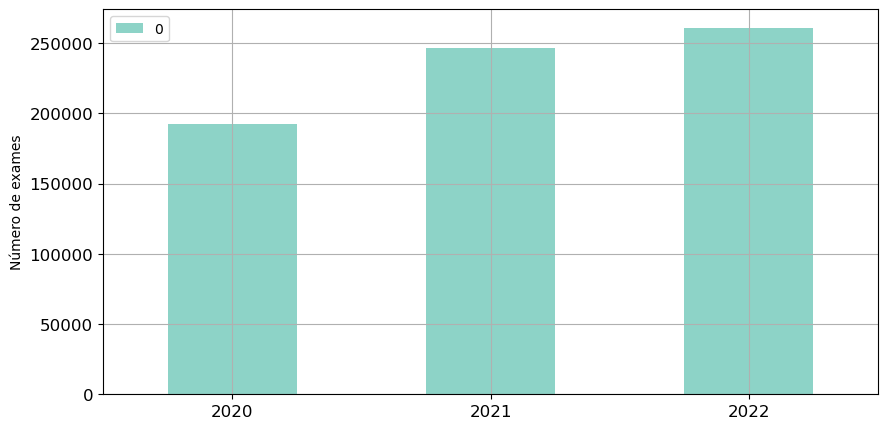

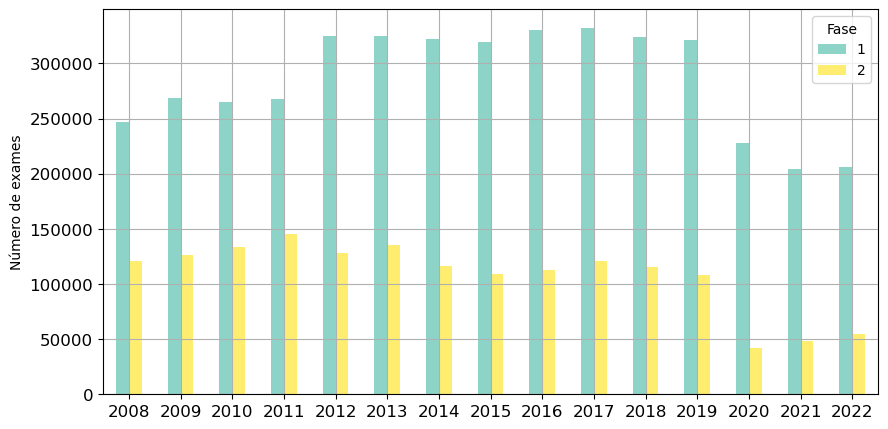

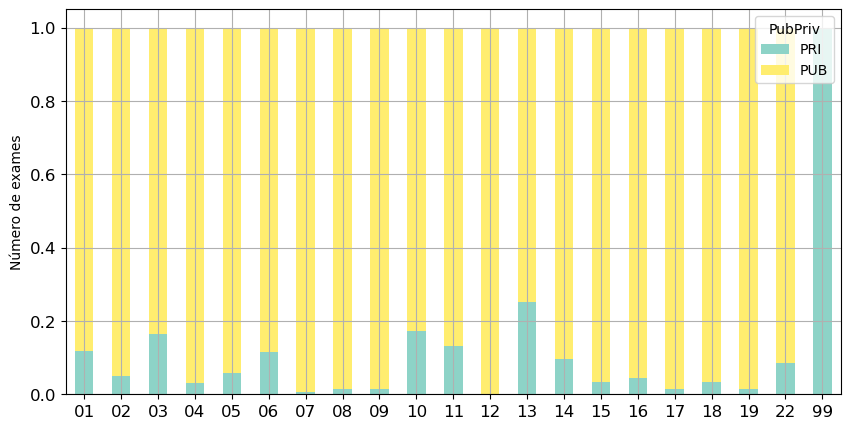

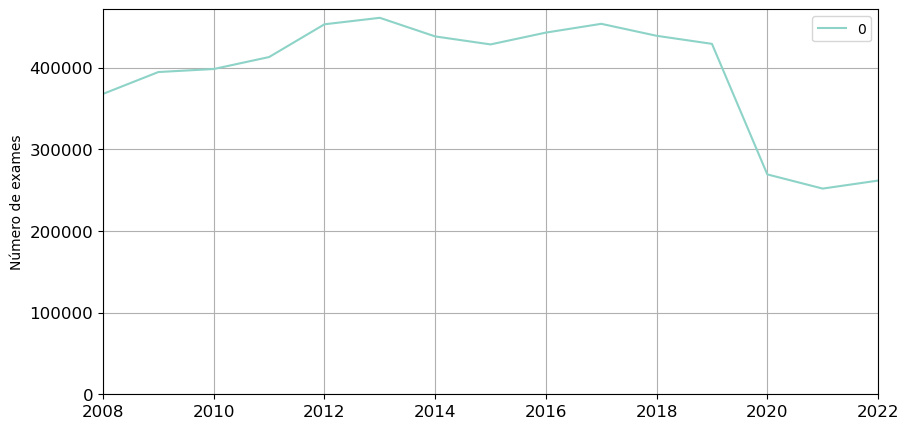

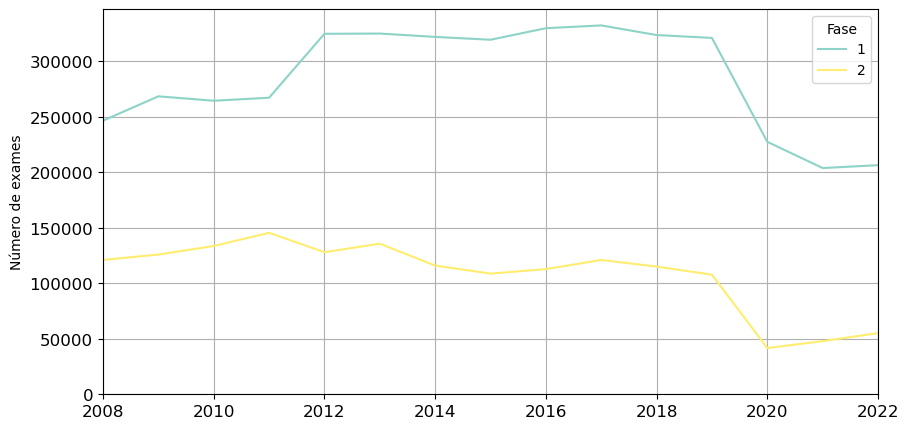

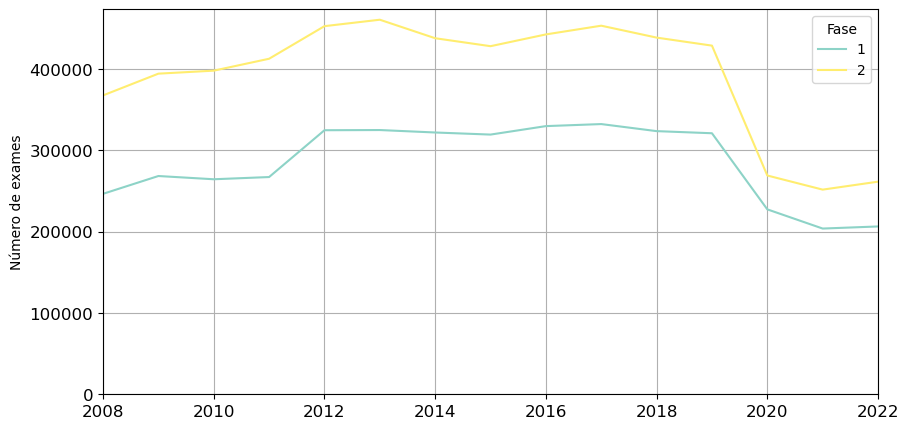

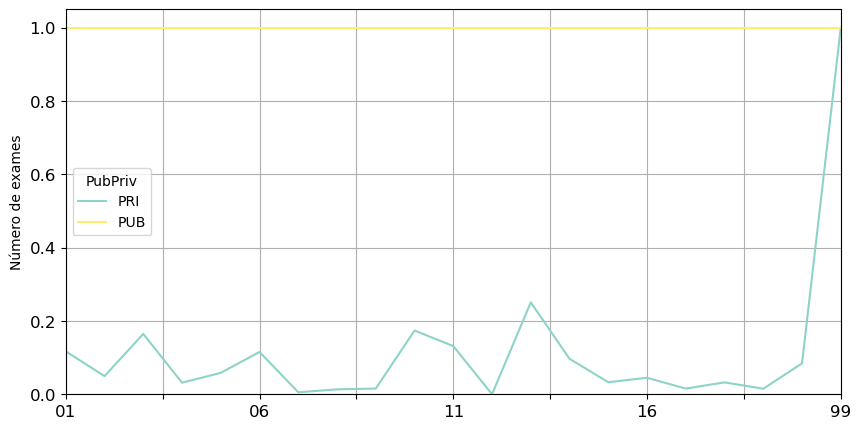

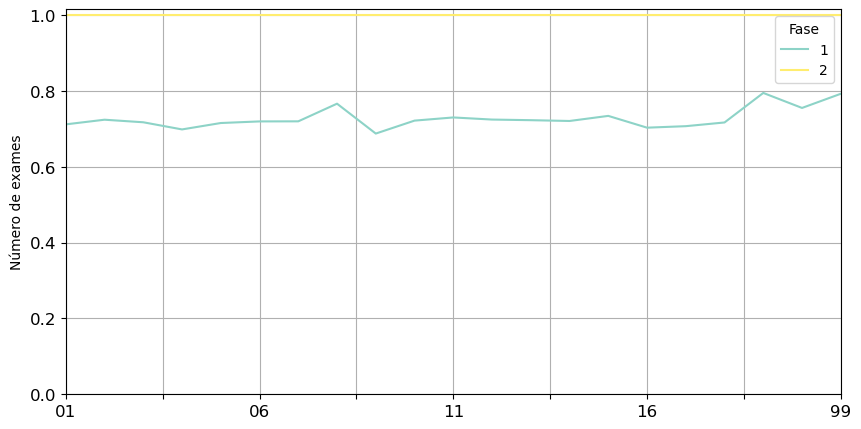

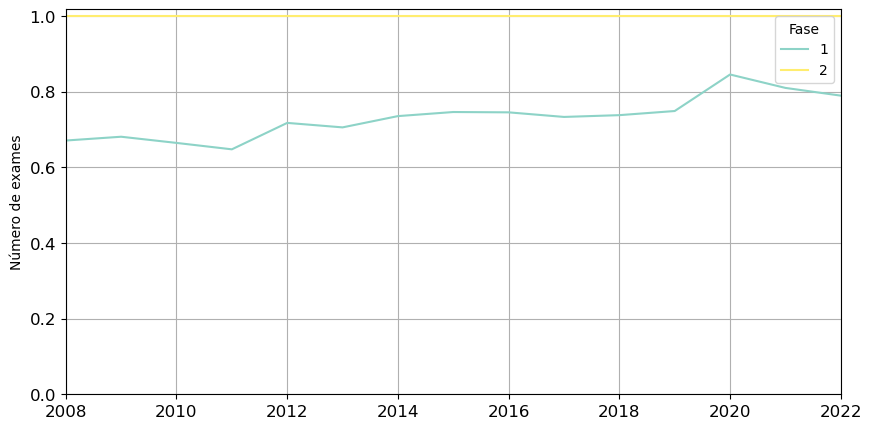

In [54]:
chart_bar( dfAll[:700000], xvar='ano', yvar='count', ylabel='Número de exames', zvar = None)
chart_bar( dfAll[:7000000], xvar='ano', yvar='count', ylabel='Número de exames', zvar = 'Fase')
chart_bar( dfAll, xvar='Distrito', yvar='count', zvar="PubPriv", ylabel='Número de exames', stacked=True, normalize=True)


chart_line( dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)
chart_line( dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = 'Fase')
chart_line( dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = 'Fase', stacked=True)
chart_line( dfAll, xvar='Distrito', yvar='count', zvar="PubPriv", ylabel='Número de exames', stacked=True, normalize=True)
chart_line( dfAll, xvar='Distrito', yvar='count', zvar="Fase", ylabel='Número de exames', stacked=True, normalize=True)
chart_line( dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', zvar="Fase", ylabel='Número de exames', stacked=True, normalize=True)



In [ ]:
chart(kind="line",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)

AttributeError: Line2D.set() got an unexpected keyword argument 'yvar'

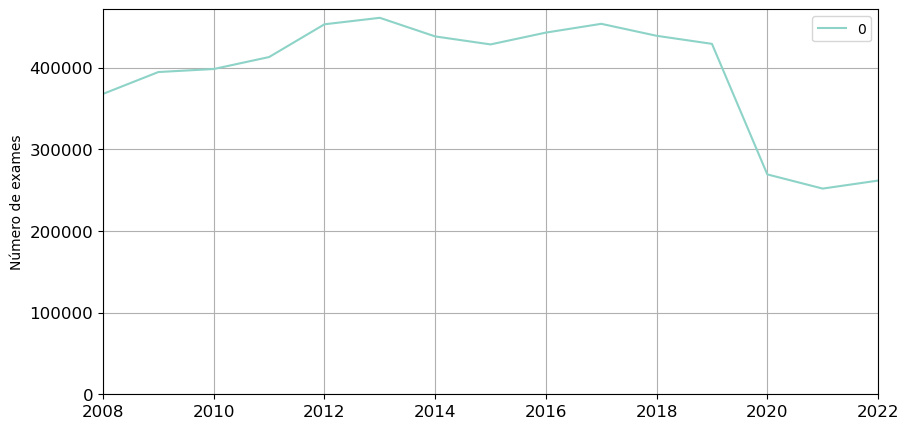

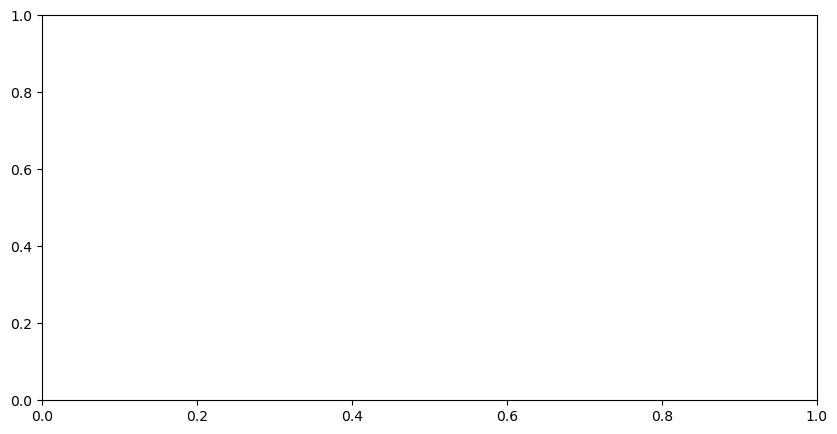

In [38]:
chart_line( dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)
chart(kind="line",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)
chart(kind="bar",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)
chart(kind="barh",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)
chart(kind="hist",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)
chart(kind="box",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)
chart(kind="area",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)







In [43]:
dfAll.head()

,ano,ID,Escola,Fase,Exame,ParaAprov,Interno,ParaMelhoria,ParaIngresso,ParaCFCEPE,...,CodDGEEC,Descr,DescrDistrito,DescrConcelho,Nuts3,DescrNuts3,Nuts2,DescrNuts2,DescrExame,TipoExame
0,2022,1,0002,1,639,N,N,S,S,N,...,1511640,None,Setúbal,Sesimbra,170,Área Metropolitana de Lisboa,17,AM Lisboa,Português,N
1,2022,2,0002,1,639,N,N,N,S,N,...,1511640,None,Setúbal,Sesimbra,170,Área Metropolitana de Lisboa,17,AM Lisboa,Português,N
2,2022,3,0002,1,639,N,N,N,S,N,...,1511640,None,Setúbal,Sesimbra,170,Área Metropolitana de Lisboa,17,AM Lisboa,Português,N
3,2022,4,0002,1,639,N,N,N,S,N,...,1511640,None,Setúbal,Sesimbra,170,Área Metropolitana de Lisboa,17,AM Lisboa,Português,N
4,2022,5,0002,1,639,N,N,N,S,N,...,1511640,None,Setúbal,Sesimbra,170,Área Metropolitana de Lisboa,17,AM Lisboa,Português,N


In [45]:
#chart(kind="pie",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)
#chart(kind="scatter",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = None)
chart(kind="hexbin",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='DescrNuts2', ylabel='Número de exames', zvar = None)



KeyError: 'DescrNuts2'

In [ ]:
chart_line( dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = 'Fase')
chart(kind="line",df= dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = 'Fase')


In [ ]:
chart_line( dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', ylabel='Número de exames', zvar = 'Fase', stacked=True)



In [ ]:
chart_line( dfAll, xvar='Distrito', yvar='count', zvar="PubPriv", ylabel='Número de exames', stacked=True, normalize=True)


In [ ]:
chart_line( dfAll, xvar='Distrito', yvar='count', zvar="Fase", ylabel='Número de exames', stacked=True, normalize=True)


In [ ]:
chart_line( dfAll, xvar='ano', xlimit=(2008,2022), yvar='count', zvar="Fase", ylabel='Número de exames', stacked=True, normalize=True)


In [ ]:
# Menos alunos em 2a fase tb implica que os alunos valorizam menos os exames!
